# **Calculate the rate of return of a security**

**1. Use data in a csv file, calculate simple annual return**

Download data for 'TSLA' from '01/01/2018' from yahoo finance as a csv file. The upload the file to colab

In [ ]:

import os
print(os.getcwd()) #current working directory

/content


https://numpy.org/

https://pandas.pydata.org/

https://matplotlib.org/

https://pypi.org/project/yfinance/

https://pandas-datareader.readthedocs.io/en/latest/readers/yahoo.html

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import data in a csv file to a pandas dataframe
df = pd.read_csv('./TSLA.csv', index_col = 'Date')

check if the data is ok using the head() and tail() functions of pandas

In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000
2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500
2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500
2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000
2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000


In [6]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-06,223.979996,226.320007,215.000000,219.270004,219.270004,117335800
2023-11-07,219.979996,223.119995,215.720001,222.179993,222.179993,116900100
2023-11-08,223.149994,224.149994,217.639999,222.110001,222.110001,106584800
2023-11-09,219.750000,220.800003,206.679993,209.979996,209.979996,142110500
2023-11-10,210.029999,215.380005,205.690002,214.649994,214.649994,130994000


**We can use historical rates of return as a reasonable proxy of expected rates of return of a security. We cannot predict returns of a security.**

**2.1 Simple rate of return**



$$
\frac{P_1 - P_0}{P_0} = \frac{P_1}{P_0} - 1
$$

*For price of a security, use adjusted close price as it reflects dividend payments to shareholders and operations such as stock splits.*

*The shift(n) method in pandas gives the value at row with lag n.
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html*

In [7]:
# 2.1.1 Calculate daily simple rate of returns using the adjusted close price
df['simple_return'] = (df['Adj Close'] / df['Adj Close'].shift(1)) - 1
print (df['simple_return'])

Date
2018-01-02         NaN
2018-01-03   -0.010233
2018-01-04   -0.008290
2018-01-05    0.006230
2018-01-08    0.062638
                ...   
2023-11-06   -0.003137
2023-11-07    0.013271
2023-11-08   -0.000315
2023-11-09   -0.054613
2023-11-10    0.022240
Name: simple_return, Length: 1476, dtype: float64


Plot simple returns

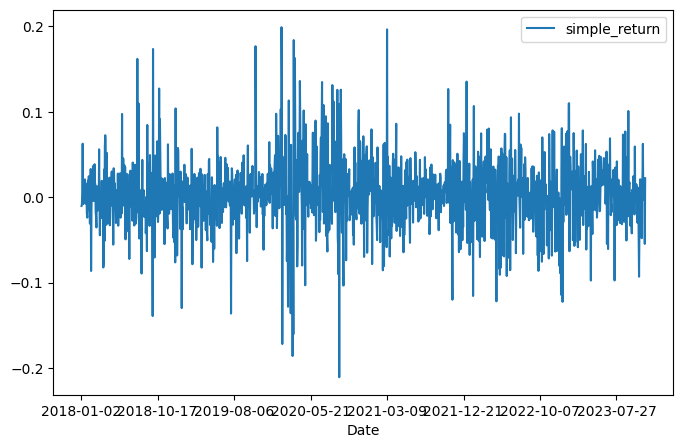

In [8]:
# 2.1.2 Line plot of daily simple return. Note, as Date is defined as index, pandas automatically uses the index column as x-axis.
df.plot(kind='line', y='simple_return', figsize=(8,5))
plt.show()

In [9]:
# 2.1.3 Average daily simple return
avg_daily_return = df['simple_return'].mean()
print('Average daily return in % : ', avg_daily_return*100)

Average daily return in % :  0.23812383883905017


In [10]:
# 2.1.4 Average annual return estimate. Assuming 250 working daya in a year.
avg_annual_return = avg_daily_return*250
print('Average annual return in % : ', avg_annual_return*100)

Average annual return in % :  59.53095970976254


**2.2 Log return**

$$
ln(\frac{P_t}{P_{t-1}})
$$

*For price of a security, use adjusted close price as it reflects dividend payments to shareholders and operations such as stock splits.*

In [17]:
# 2.2.1 Calculate daily log rate of returns using adjusted close price
df['log_return'] = np.log(df['Adj Close'] / df['Adj Close'].shift(1))
print (df['log_return'])

Date
2018-01-02         NaN
2018-01-03   -0.010286
2018-01-04   -0.008325
2018-01-05    0.006210
2018-01-08    0.060755
                ...   
2023-11-06   -0.003142
2023-11-07    0.013184
2023-11-08   -0.000315
2023-11-09   -0.056160
2023-11-10    0.021996
Name: log_return, Length: 1476, dtype: float64


**Plot the returns on a graph**

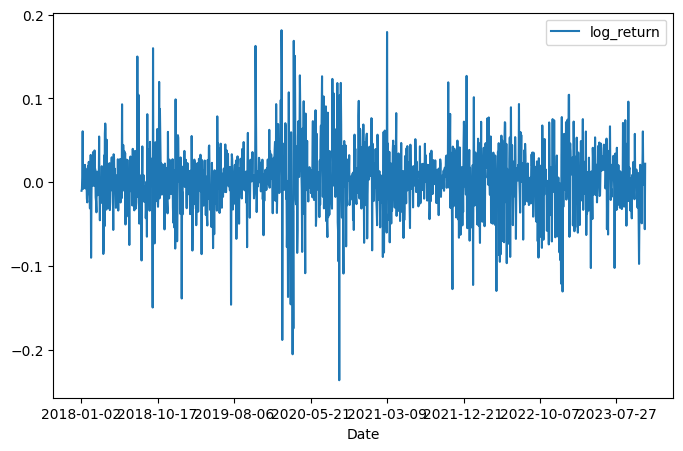

In [18]:
# 2.2.2 Line plot of daily log returns. Note, as Date is defined as index, pandas automatically uses the index column as x-axis.
df.plot(kind='line', y='log_return', figsize=(8,5))
plt.show()

In [19]:
# 2.2.3 Average daily log return
avg_daily_log_return = df['log_return'].mean()
print('Average daily log return in % : ', avg_daily_log_return*100)

Average daily log return in % :  0.15641240879317467


In [20]:
# 2.2.4 Average annual log return estimate. Assuming 250 working days in a year.
avg_annual_log_return = avg_daily_log_return*250
print('Average annual log return in % : ', avg_annual_log_return*100)

Average annual log return in % :  39.10310219829367


**Log return vs. simple return:**
- use log rate of return when there is a single security whose rate of return is needed over multiple time periods.
- use simple rate of return to compare returns of multiple securities over the same time period

https://en.wikipedia.org/wiki/Rate_of_return,  
https://www.allquant.co/post/magic-of-log-returns-concept-part-1



**3. Use data extracted using an API, calculate simple annual return**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


https://pandas-datareader.readthedocs.io/en/latest/readers/yahoo.html

Download data for TSLA from '01-01-2018'

In [4]:
df2 = yf.download('TSLA', start='2018-1-1') #data for trading days. no data for saturdays/sundays and bank holidays.

[*********************100%***********************]  1 of 1 completed


**Check if the data is ok using the head() and tail() functions of pandas**

In [5]:
df2.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2018-01-02 00:00:00+00:00,21.368668,21.368668,21.474001,20.733334,20.799999,65283000
2018-01-03 00:00:00+00:00,21.150000,21.150000,21.683332,21.036667,21.400000,67822500
2018-01-04 00:00:00+00:00,20.974667,20.974667,21.236668,20.378668,20.858000,149194500
2018-01-05 00:00:00+00:00,21.105333,21.105333,21.149332,20.799999,21.108000,68868000
2018-01-08 00:00:00+00:00,22.427334,22.427334,22.468000,21.033333,21.066668,147891000


In [6]:
df2.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2024-11-04 00:00:00+00:00,242.839996,242.839996,248.899994,238.880005,244.559998,68802400
2024-11-05 00:00:00+00:00,251.440002,251.440002,255.279999,246.210007,247.339996,69282500
2024-11-06 00:00:00+00:00,288.529999,288.529999,289.589996,275.619995,284.670013,165228700
2024-11-07 00:00:00+00:00,296.910004,296.910004,299.750000,285.519989,288.890015,117309200
2024-11-08 00:00:00+00:00,321.220001,321.220001,328.709991,297.660004,299.140015,203590100


**4.1 Simple Rate fo Return**



$$
\frac{P_1 - P_0}{P_0} = \frac{P_1}{P_0} - 1
$$

*For price of a security, use adjusted close price as it reflects dividend payments to shareholders and operations such as stock splits.*

In [7]:
# 4.1.1 Calculate daily simple rate of returns using the adjusted close price
df2['simple_return'] = (df2['Adj Close'] / df2['Adj Close'].shift(1)) - 1
print (df2['simple_return'])

Date
2018-01-02 00:00:00+00:00         NaN
2018-01-03 00:00:00+00:00   -0.010233
2018-01-04 00:00:00+00:00   -0.008290
2018-01-05 00:00:00+00:00    0.006230
2018-01-08 00:00:00+00:00    0.062638
                               ...   
2024-11-04 00:00:00+00:00   -0.024661
2024-11-05 00:00:00+00:00    0.035414
2024-11-06 00:00:00+00:00    0.147510
2024-11-07 00:00:00+00:00    0.029044
2024-11-08 00:00:00+00:00    0.081877
Name: simple_return, Length: 1726, dtype: float64


Plot simple returns

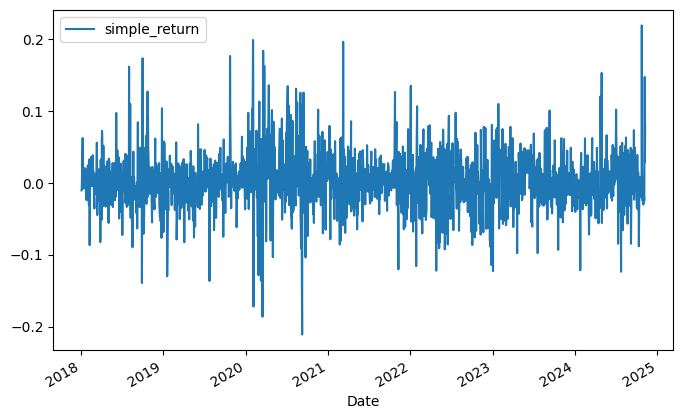

In [8]:
# 4.1.2 Line plot of daily simple return. Note, as Date is defined as index, pandas automatically uses the index column as x-axis.
df2.plot(kind='line', y='simple_return', figsize=(8,5))
plt.show()

In [9]:
# 4.1.3 Average daily return
avg_daily_return2 = df2['simple_return'].mean()
print('Average daily return in % : ', avg_daily_return2*100)

Average daily return in % :  0.2372268912616538


In [10]:
# 4.1.4 Average annual return estimate. Assuming 250 trading days in a year.
avg_annual_return2 = avg_daily_return2*250
print('Average annual return in % : ', avg_annual_return2*100)

Average annual return in % :  59.30672281541346


**4.2 Log return**

$$
ln(\frac{P_t}{P_{t-1}})
$$

*For price of a security, use adjusted close price as it reflects dividend payments to shareholders and operations such as stock splits.*

In [11]:
# 4.2.1 Calculate daily log rate of returns using the adjusted close price
df2['log_return'] = np.log(df2['Adj Close'] / df2['Adj Close'].shift(1))
print (df2['log_return'])

Date
2018-01-02 00:00:00+00:00         NaN
2018-01-03 00:00:00+00:00   -0.010286
2018-01-04 00:00:00+00:00   -0.008325
2018-01-05 00:00:00+00:00    0.006210
2018-01-08 00:00:00+00:00    0.060755
                               ...   
2024-11-04 00:00:00+00:00   -0.024970
2024-11-05 00:00:00+00:00    0.034802
2024-11-06 00:00:00+00:00    0.137595
2024-11-07 00:00:00+00:00    0.028630
2024-11-08 00:00:00+00:00    0.078697
Name: log_return, Length: 1726, dtype: float64


# **Calculate the risk of a security**

**Risk is the volatility/variability of returns. It is measured by variance or standard deviation of returns of a stock. It measures the deviation from the mean. A volatile stock is more likely to deviate from historical returns and surprise investors**

**References:**
https://www.investopedia.com/ask/answers/021915/how-standard-deviation-used-determine-risk.asp
https://www.investopedia.com/terms/s/standarddeviation.asp
https://www.investopedia.com/articles/stocks/11/calculating-risk-reward.asp#:~:text=When%20you%27re%20an%20individual,price%20of%20your%20maximum%20risk.

**5.1 Daily Risk**

In [12]:
# 5.1 Calculate daily risk using the daily simple rate of return
print(df2['simple_return'].std())

0.04010964693344883


**5.2 Annual Risk**

Annual risk = square root of (variance of daily returns * 250) = standard deviation of daily returns * square root of 250

In [13]:
# 5.2 Calculate annual risk using the daily simple returns. Assuming 250 trading days in a year.
print( df2['simple_return'].std()* (250**0.5))

0.6341892022744319


In [43]:
print('variance: ', df2['simple_return'].var())
print('std dev : ',(df2['simple_return'].var() *250) **0.5)

variance:  0.0016087837771259215
std dev :  0.634189202274432


Ticker
TSLA    21.368668
Name: 2018-01-02 00:00:00+00:00, dtype: float64
